In [62]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
unitsTab=pd.read_csv('codes/units.csv')
unitsTab.index = unitsTab['Unit Code']
unitsDict=unitsTab.to_dict()["Units"]

In [3]:
paramsTab=pd.read_csv('codes/parameters.csv')
paramsTab.index = paramsTab['Parameter Code']
paramsDict = paramsTab.to_dict()['Parameter']

In [37]:
df=pd.read_csv('raw_data/long_term.csv',parse_dates=[3])
df.dropna(subset=['datetime'],inplace=True)
df.drop(['uncertainty', 'qualifiers', 'frequency'],axis=1, inplace=True)
df.index = df.datetime
df.tail()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,site,data_status,action_code,datetime,parameter,duration,value,unit,qc,poc,lat,lon,GISDatum,elev,method_code,mpc,mpc_value
datetime,,,,,,,,,,,,,,,,,
2011-06-25 06:00:00,840420430401,0.0,10.0,2011-06-25 06:00:00,88101.0,60.0,8.6,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0
2009-10-01 06:00:00,840420430401,0.0,10.0,2009-10-01 06:00:00,88101.0,60.0,3.4,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0
2016-04-27 06:00:00,840420430401,0.0,10.0,2016-04-27 06:00:00,88101.0,60.0,2.6,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0
2009-01-16 06:00:00,840420430401,0.0,10.0,2009-01-16 06:00:00,88101.0,60.0,10.1,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0
2015-10-28 06:00:00,840420430401,1.0,10.0,2015-10-28 06:00:00,88101.0,60.0,4.9,105.0,0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0


In [49]:
df.sort_index();

In [38]:
df.replace({'unit':unitsDict, 'parameter':paramsDict}, inplace=True)

In [39]:
(PM10, O3, CO, NO2, SO2, PM25) = df.parameter.unique()
print(df.parameter.unique())

['PM10 Total 0-10um STP' 'Ozone' 'Carbon monoxide' 'Nitrogen dioxide (NO2)'
 'Sulfur dioxide' 'PM2.5 - Local Conditions']


In [40]:
[df.datetime.min(),df.datetime.max()]

[Timestamp('2000-01-01 05:00:00'), Timestamp('2017-01-01 04:00:00')]

In [41]:
df.describe()

,data_status,action_code,duration,value,qc,poc,lat,lon,elev,method_code,mpc,mpc_value
count,474936.000000,474936.0,474936.0,474936.000000,474936.0,474936.000000,4.749360e+05,4.749360e+05,474936.0,474936.000000,474936.0,474936.000000
mean,0.431784,10.0,60.0,9.239459,0.0,2.044937,4.024699e+01,-7.684699e+01,125.0,99.556633,1.0,-9.157663
std,0.495325,0.0,0.0,11.372314,0.0,1.631349,2.131630e-14,7.105435e-14,0.0,25.553775,0.0,20.981478
min,0.000000,10.0,60.0,-10.000000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,79.000000,1.0,-50.000000
25%,0.000000,10.0,60.0,0.070000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,87.000000,1.0,0.005000
50%,0.000000,10.0,60.0,5.000000,0.0,1.000000,4.024699e+01,-7.684699e+01,125.0,93.000000,1.0,0.400000
75%,1.000000,10.0,60.0,14.000000,0.0,3.000000,4.024699e+01,-7.684699e+01,125.0,100.000000,1.0,2.700000
max,1.000000,10.0,60.0,321.000000,0.0,5.000000,4.024699e+01,-7.684699e+01,125.0,170.000000,1.0,5.000000


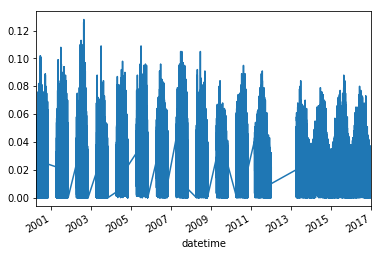

In [157]:
df[df.parameter==O3].value.plot()

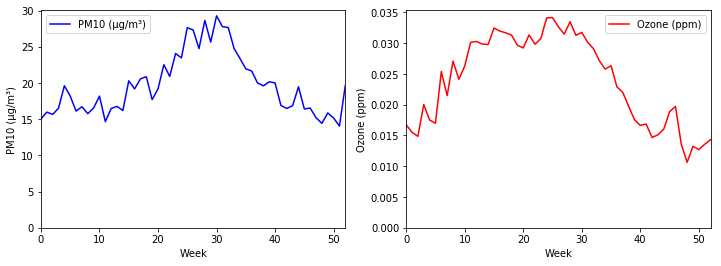

In [154]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time

fig = plt.figure(figsize=(12,4)) # Create matplotlib figure

ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = fig.add_subplot(122)


annual_mean = df[df.parameter==PM10].groupby('woy').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'],loc='upper left')
ax.set_ylabel('PM10 (μg/m³)')
ax.set_ylim(ymin=0)

annual_mean = df[df.parameter==O3].groupby('woy').value.mean()
annual_mean.plot(ax=ax2,color='red')
ax2.legend(['Ozone (ppm)'])
ax2.set_ylabel('Ozone (ppm)')
ax2.set_ylim(ymin=0)

ax.set_xlabel('Week')
ax2.set_xlabel('Week')

plt.savefig('annual.png',dpi=1000)

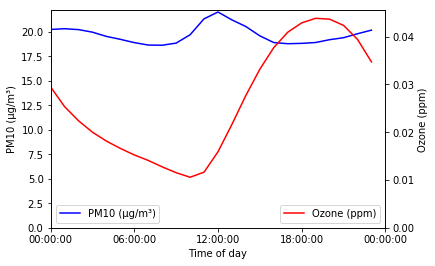

In [155]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

annual_mean = df[df.parameter==PM10].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='blue')
ax.legend(['PM10 (μg/m³)'],loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

annual_mean = df[df.parameter==O3].groupby('tod').value.mean()
annual_mean.plot(ax=ax2,color='red')
ax2.legend(['Ozone (ppm)'],loc='lower right')
ax2.set_ylabel('Ozone (ppm)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)
ax2.set_ylim(ymin=0)

plt.savefig('daily.png',dpi=1000)

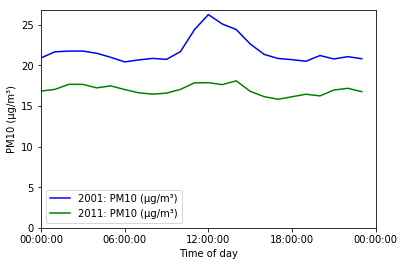

In [156]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==PM10) & (df.year==2001)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='blue')

annual_mean = df[(df.parameter==PM10) & (df.year==2011)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='green')

ax.legend(['2001: PM10 (μg/m³)','2011: PM10 (μg/m³)'],loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

plt.savefig('change_pm10.png',dpi=1000)

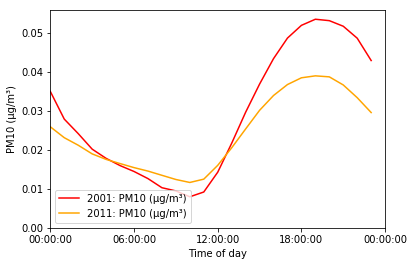

In [158]:
df['doy']=df.index.dayofyear
df['woy']=(df.doy/7).astype(int)
df['tod']=df.index.time
df['year']=df.index.year

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

annual_mean = df[(df.parameter==O3) & (df.year==2001)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='red')

annual_mean = df[(df.parameter==O3) & (df.year==2011)].groupby('tod').value.mean()
annual_mean.plot(ax=ax,color='orange')

ax.legend(['2001: PM10 (μg/m³)','2011: PM10 (μg/m³)'],loc='lower left')
ax.set_ylabel('PM10 (μg/m³)')

ax.set_xlabel('Time of day')
ax.set_xticks(np.array(range(0,25,6))*3600)
ax.set_xlim((0,24*3600))
ax.set_ylim(ymin=0)

plt.savefig('change_pm10.png',dpi=1000)

In [128]:
for p in df.parameter.unique():
    print(p, df[df.parameter==p].unit.unique())

PM10 Total 0-10um STP ['Micrograms/cubic meter (25 C)']
Ozone ['Parts per million']
Carbon monoxide ['Parts per million']
Nitrogen dioxide (NO2) ['Parts per billion']
Sulfur dioxide ['Parts per billion']
PM2.5 - Local Conditions ['Micrograms/cubic meter (LC)']


In [90]:
df.tail(100)

,site,data_status,action_code,datetime,parameter,duration,value,unit,qc,poc,lat,lon,GISDatum,elev,method_code,mpc,mpc_value,doy,woy,tod
datetime,,,,,,,,,,,,,,,,,,,,
2015-08-09 06:00:00,840420430401,1.0,10.0,2015-08-09 06:00:00,PM2.5 - Local Conditions,60.0,17.3,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,221,31,06:00:00
2009-11-04 06:00:00,840420430401,0.0,10.0,2009-11-04 06:00:00,PM2.5 - Local Conditions,60.0,5.0,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,308,44,06:00:00
2014-04-30 06:00:00,840420430401,0.0,10.0,2014-04-30 06:00:00,PM2.5 - Local Conditions,60.0,1.7,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,120,17,06:00:00
2014-05-16 06:00:00,840420430401,0.0,10.0,2014-05-16 06:00:00,PM2.5 - Local Conditions,60.0,11.7,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,136,19,06:00:00
2016-01-14 06:00:00,840420430401,0.0,10.0,2016-01-14 06:00:00,PM2.5 - Local Conditions,60.0,5.0,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,14,2,06:00:00
2015-09-28 06:00:00,840420430401,1.0,10.0,2015-09-28 06:00:00,PM2.5 - Local Conditions,60.0,10.8,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,271,38,06:00:00
2015-05-31 06:00:00,840420430401,1.0,10.0,2015-05-31 06:00:00,PM2.5 - Local Conditions,60.0,10.5,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,151,21,06:00:00
2015-08-02 06:00:00,840420430401,1.0,10.0,2015-08-02 06:00:00,PM2.5 - Local Conditions,60.0,10.3,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,214,30,06:00:00
2009-06-09 06:00:00,840420430401,0.0,10.0,2009-06-09 06:00:00,PM2.5 - Local Conditions,60.0,46.2,Micrograms/cubic meter (LC),0.0,3.0,40.246992,-76.846988,WGS84,125.0,170.0,1.0,5.0,160,22,06:00:00
